## Types of Data
### Nominal Data
sometimes called categorical data, is data that has no ordering between the different values.
### Ordinal Data
The data has a ranking or order, though differences aren't meaningful in a mathematical sense. For example, if a questionnaire asks you to select from "strongly disagree", "disagree", "neutral", "agree", and "strongly agree"
### Interval Data
Has meaningful differences. For example, if one cup of water is a 40 degrees F and another is at 80 degrees F, we can say that there is 40-dgreee difference between the two cups of water.
### Ratio Data
Ratio data is data where differences are meaningful, and there is a true zero point. Height is a ratio value because a height of zero is just that no height at all. 

## Using Nominal Data in Deep Learning
We can not use nominal data directly in machine learning. Let's say we have 3 colors (red, green and blue), we can't assign 1 to red, 2 to green and 3 to blue, then use it to deep learning. Because the model will treat blue as 3 red (1) which is wrong. We usually do one-hot encoding.    
In one-hot, we turn single nominal variable into a vector, where each element of the vector corresponds to one of the nominal values. 

## Summary statistics
Should be the first thing you do when handed a new dataset. Summary statistics including: means, the median, measures of variation( variance, standard deviation, standard error). The range and mode are also often mentioned.

The range is the difference between the maximum and minimum of the dataset.    
The mode is the most frequent value in the dataset. 

We generally get a sense of the mode visually from the histogram, as the histogram shows us the shape of the distribution.

### Means
1. unweighted mean
2. weighted mean
3. Geometric Mean: square root of a n positive number's product. In deep learning *Matthews correlation coefficient(MCC)* is the geometric mean of the informedness and the markedness.
4. Harmonic Mean: E(Xh) = n / (1/x0 + 1/x1 + ... 1/xn-1): In deep learning: F1 score = 2 /(1/recall + 1/precision) = 2* (recall*precision)/(recall + precision)
   recall = TP/(TP+FN), precision = TP/(TP+FP).
   As F1 score ignore TN, is often too optimistic. Better metrics are the MCC or Cohens' K (kappa)

### Median
Median is sensitve to the ordering of the values.

### Measures of Variation
#### Deviation vs. Variance
Mean deviation MD = sum(|xi-mx|)/n, mx is the mean of x. It's rarely used in practice as absolute value is annoying to deal with mathematically. Instead we use squared difference: Sn^2 = SUM((xi-mx)^2)/n, it's also known as the *biased sample variance*. S^2 = SUM((xi-mx)^2)/(n-1) is known as *unbiased sample variance*, the (n-1) is **Bessel's correction**. Because we usually use standard deviation instead of variance. So we use Sn^2 to denote variance and S for standard divation. For a large dataset, Sn and S has fewer difference, so the library may use Sn instead of S. 

**Median Absolute Deviation** The standard deviation is based on the mean and is sensitive to extreme values. The *Median Absolute Deviation* is used to measure variability that is insensitive to extreme values.  MAD=median(|Xi - median(X)|). The MAD is **not often** used. But its insensitivity to extreme values in the dataset argues toward more frequent use, especially for outlier detection 

### Standard Error vs Standard Deviation 
Stand Error of the mean (SEM) is often called *standard error* (SE). Standard error is the standard deviation of the set of means. SE= S/sqrt(n). 
1. Use standard deviation to learn about the distribution of the samples around the mean.  
2. Use standard error to say something about how good an estimate of the population mean a sample mean is. 


## Quantiles and Box Plots
A *quantile* splits the dataset into fixed-sized groups where the fixed size is the number of data values in the quantile. Since the median split the dataset to 2 parts. So it is called 2-quantile or *50th percentile*. *95th percentile* means 95% of data in the dataset is less than the value.   

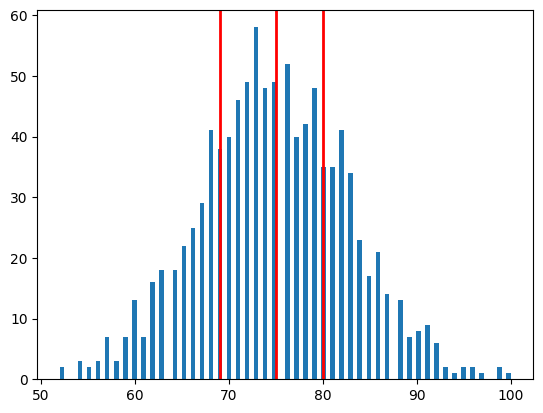

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

# Since we don't have the exams.npy, we can generate the data by uniform distribution with mean to 75 and std to 5
d = np.random.normal(75, 8, 1000)
p = d.astype('uint32')
q = np.quantile(p, [0.25, 0.5, 0.75])

plt.hist(p, bins=100)
for i in range(len(q)):
    plt.axvline(q[i],  color='r', linewidth=2)



{'whiskers': [<matplotlib.lines.Line2D at 0x7f84f9508730>,
 'caps': [<matplotlib.lines.Line2D at 0x7f84f9508b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f84f9508400>],
 'medians': [<matplotlib.lines.Line2D at 0x7f84f9509030>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f84f95092d0>],
 'means': []}

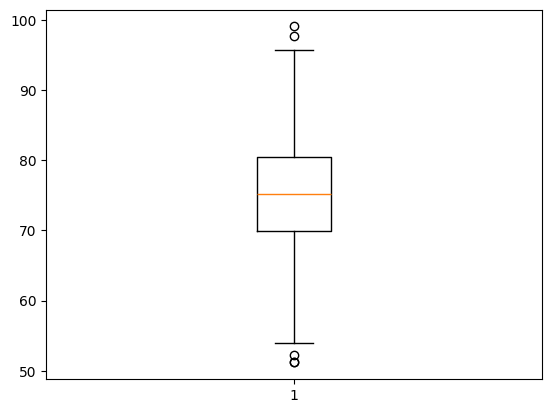

In [23]:
plt.boxplot(d)

Sometimes, it is OK to drop outlier from dataset. But if the outlier is caused by missing data, then dropping might not be an option.

## Missing Data
We can take a look at the distribution of the dataset without the missing data. Naively we can use mean to fill the missing value. But if the distribution is far from normal distribution, we probably use median to fill the missing data.  

Additionaly if the dataset is labeld, the mean and median has to be calculated for each group. Otherwise the value might be inappropriate


<Axes: >

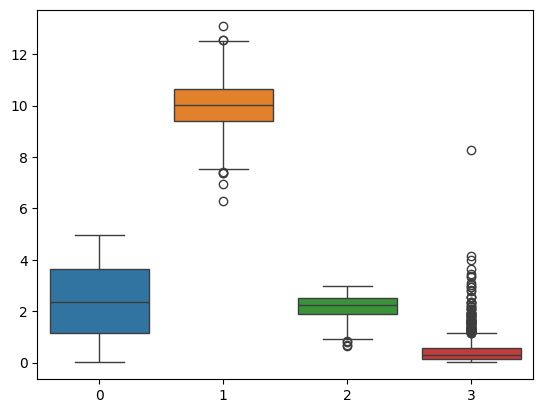

In [36]:
N = 1000
# Fix seed for reproducibility
np.random.seed(42345)
x = np.zeros((N, 4))
x[:, 0] = 5*np.random.random(N)
x[:, 1] = np.random.normal(10, 1, size=N)
x[:, 2] = 3*np.random.beta(5, 2, size=N)
x[:, 3] = 0.3*np.random.lognormal(size=N)

# Dropping data
for i in range(4):
    idx = np.random.randint(0, N, size=int(0.05*N))
    x[idx, i] = np.nan

# Matplotlib boxplot doesn't support NaNs, so we need to remove them
# Or use seaborn instead
# removing nans 
# mask = ~np.isnan(x)
# filtered_data = [d[m] for d, m in zip(x.T, mask.T)]
import seaborn as sns
sns.boxplot(x)

<Axes: >

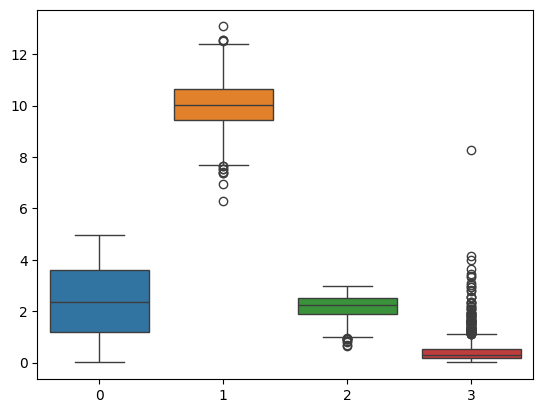

In [38]:
# From the above box graph, there are 2 seriese which is definitely not normal distribution, we prabably need to push to use median instead of mean.
for i in range(4):
    good_data = x[~np.isnan(x[:, i]), i]
    bad_data_idx = np.isnan(x[:, i]) == True 
    x[bad_data_idx, i] = np.median(good_data)

sns.boxplot(x)

## Correlation 
Some times feature variables might be correlated with each other. For example one goes up another goes up or down (may not be linear though.) It is called *correlation* For example adjecent pixels in a picture. 

### Pearson Correlation
The *Pearson Correlation* returns a coefficient  -1 <= r <= 1 indicate the linear correlation. If x goes up and y goes up exact ammount, then the r is 1. If x goes up and y goes down exact ammount, then r = -1. If r closer to 0, then high possible that x and y are not correlated. But there are cases that x and y are non-linear correlated, but they're correlated.  
![PearsonCorrelation](chapter4/PearsonCorrelation.png)


In [39]:
def pearson_corr(x, y):
    e_x_square = np.mean(x)**2
    e_y_square = np.mean(y)**2
    e_xy = np.mean(x*y)
    e_x_e_y = np.mean(x)*np.mean(y)
    e_square_x = np.mean(x**2)
    e_square_y = np.mean(y**2)
    return (e_xy - e_x_e_y)/np.sqrt((e_square_x - e_x_square)*(e_square_y - e_y_square))

In [67]:
np.random.seed(8675309)
N = 100
x = np.random.normal(0, 1, size=N)
y = np.random.random(N)*x 
z = -0.1 * np.random.random(N)*x

print(pearson_corr(x, y))
print(pearson_corr(x, z))
print(pearson_corr(y, z))

print(np.corrcoef(np.vstack((x, y, z))))

0.8263598888356365
-0.8604477484469406
-0.7328286195638422
[[ 1.          0.82635989 -0.86044775]
 [ 0.82635989  1.         -0.73282862]
 [-0.86044775 -0.73282862  1.        ]]


In [48]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")

a = china[230, :, 1].astype('float64')
b = china[231, :, 1].astype('float64')
c = china[400, :, 1].astype('float64')
d = np.random.random(640).astype('float64')

print(pearson_corr(a, b))
print(pearson_corr(a, c))
print(pearson_corr(b, c))
print(pearson_corr(a, d))
print(pearson_corr(b, d))
print(pearson_corr(c, d))

0.8979294733086834
-0.2760642212905016
-0.2566169170895508
-0.016595333616449118
-0.014487026492166368
0.07220497519972253


### Spearman Correlation 
Spearman correlation look the rank of the feature values not the value itself. **X, Y should have no duplicated value**

![SpearmanCorrelation](chapter4/SpearmanCorrelation.png)

Where d = rank(X) - rank(Y)

In [74]:
def rank(x):
    x_sorted = np.sort(x)
    return [np.where(x_sorted == x[i])[0][0] for i in range(len(x))]

def spearman_corr(x, y):
    x_rank = np.array(rank(x))
    y_rank = np.array(rank(y))
    return 1 - (6*np.sum((x_rank - y_rank)**2))/(x.shape[0]*(x.shape[0]**2 - 1))

In [78]:
from scipy.stats import spearmanr
print(spearman_corr(x, y), spearmanr(x, y)[0])
print(spearman_corr(x, z), spearmanr(x, z)[0])
print(spearman_corr(y, z), spearmanr(y, z)[0])

0.9002220222022203 0.90022202220222
-0.9457905790579058 -0.9457905790579058
-0.8468046804680469 -0.8468046804680466


In [81]:
ramp = np.linspace(-20, 20, 1000)
sig = 1/(1 + np.exp(-ramp))

print(pearson_corr(ramp, sig))
print(spearman_corr(ramp, sig))

0.9053277293366915
1.0


## Hypotheses testing
Hypothesis testing can be its own book. For this book, the discussion will be limited for two types:
1. t-testing for unpaired samples for different variances (parametric test)
2. Mann-Whitney U (a nonparametric test)

### Hypotheses
To understand if two sets of data are from the same parent distribution or not, we might look at sumamary statistics. 
In hypothesis testing, we have two hypotheses:
1. *null hypothesis (H0)* is that the two sets of data are from the same parent.
2. *alternative hypothesis(Ha)* is that the two sets are not from the same distribution.

**Hypothesis testing doesn't tell us definitively whether H0 is true. Instead, it gives us evidence in favor of rejecting or accepting the H0.**

*two-sided* or *two-tailed*. If we want to to know about the test statistic being above or below some fraction of that distribution, we're making two-sided test. If we want to know about the likehood of the test statistic being above a particular value without caring about it being below or vice versa, then we're making a one-sided test.

**Assumptions and Appproche:**
1. We have two independent sets of data we wish to compare.
2. We're makeing no assumption as to whether the standard deviations of the data are the same.
3. Our null hypothesis is that the means of the parent distributions of the datasets are the same, H0: u1 = u2. We'll use the sample means and sample standard deviations (s1, s2) to help us decide to accept or reject H0.
4. Hypothesis tests assume that the data is *independent and identically distributed (i.i.d.)*. We interpret this as a statement that the data is a fair random sample.

### The t-test
The t-test is a *parametric* test. This means there are assumptions about the data and the distribution of the data. Specifically, the t-test assumes, beyond the data being i.i.d., that the distribution of the data is normal. There are many ways to test if a dataset is normally distributed, but we'll ignore them, as there's some debate about the utility of such tests. Instead, I'll (somewhat recklessly) suggest you use the t-test and the Mann-Whitney U test together to help make your decision about accepting or rejecting H0. Generally speaking, if nonparametric test is claiming evidence against H0, then one should probbly accept the evidence against H0. If the t-test result is against H0, but the Mann-Whitney U test isn't and you think the data is normal, then you might accept the t-test result. And we explicitly stated above that we'll use a version designed for datasets of differing size and variance: **Welch's t-test** which doesn't assume the variance of the two datasets is the same 

![Welch's t-test](chapter4/welch-t-test.png)

When we reject H0, we say that the difference is *statistically significant*. The threshold for accepting/rejecting H0 is called α, usually with α = 0.05 as a typical, if problematic, value. 

The *p*-value assumes the null hypothesis is true. If the *p*-value is small, that has two possible meanings:
1. The null hypothesis is false, 
2. Or a tandom sampling error has given us samples that fll outside what we might expect.

If repeated experiments all have a *p*-value around 0.05, then rejecting the null hypothesis begins to make sense. As single test with 0.05 might reject 30 percent of true H0. According to James Berger and Thomas Sellke in their article "Testing a Point Null Hypothesis: The Irreconcilability of *P* Values and Evidence"(*Journal of the American Statistical Association, 1987*) 

#### Confidence Intervals 
Along *p*-value, you'll often see *confidence intervals (CIs)*. Any CI that includes zero signals to us that we cannot reject the null hypothesis.
For Welchi's t-test, the degrees of freedom is 

![df](chapter4/welch-t-test-degrees-freedom.png)

which we can use to calculate confidence intervals

![CIs](chapter4/confidence-intervals.png)

#### Effect Size
A popular measure of the size of an effect, the effect size, is *Cohen's d* 

![cohen's d](chapter4/cohen-d.png)
![cohen'd to effect](chapter4/cohend-effect-size.png)

In [3]:
# Generate datasets
np.random.seed(65535)
a = np.random.normal(85, 6, size=50).astype('int32')
a[np.where(a > 100)] = 100
b = np.random.normal(82, 7, size=50).astype('int32')
b[np.where(b > 100)] = 100


In [9]:
# Apply the t-test
from scipy.stats import ttest_ind
from scipy import stats
t,p = ttest_ind(a, b, equal_var=False)
print("t=%0.5f, p=%0.5f" % (t, p))

def CI(a, b, alpha=0.05):
    n1, n2 = len(a), len(b)
    s1, s2 = np.std(a, ddof=1)**2, np.std(b, ddof=1)**2
    df = (s1/n1 + s2/n2)**2/((s1/n1)**2/(n1-1) + (s2/n2)**2/(n2-1))
    # Percent point function.
    tc = stats.t.ppf(1-alpha/2, df)
    lo = (a.mean() - b.mean()) - tc*np.sqrt(s1/n1 + s2/n2)
    hi = (a.mean() - b.mean()) + tc*np.sqrt(s1/n1 + s2/n2)
    return lo, hi

ci = CI(a, b)
print("CI=(%0.5f, %0.05f)"%ci)

def cohen_d(a, b):
    s1, s2 = np.std(a, ddof=1)**2, np.std(b, ddof=1)**2
    return (a.mean() - b.mean())/np.sqrt((s1 + s2)/2)

print("Cohen's d=%0.5f"%cohen_d(a, b))

t=2.40234, p=0.01852
CI=(0.56105, 5.95895)
Cohen's d=0.48047


### Mann-Whitney U Test

The null hypothesis for this test is the following: **The probability that a randomly selected value from Group 1 is larger than a randomly selected value from Group 2 is 0.5.**. (Not greater than 0.5 nor less than 0.5.) 
The alternative hypothesis is that probability of a randomly selected value from Group 1 being larger than a randomly selected value from Group 2 is not 0.5.

When two datasets are not from same parent distribution, the null hypothesis will be false.

![Mann-whitney U test](chapter4/mann-whitney-u.png)

In [4]:
from scipy.stats import mannwhitneyu

u, p = mannwhitneyu(a, b)
print("Mann-Whitney U=%0.5f, p=%0.5f"%(u, p))


Mann-Whitney U=1503.00000, p=0.08117
